# Data Cleaning and Formatting

Data Analysis on features that contribute to loan default or a serious delinquency within the past two years. 


In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import plotly.io as pio
from IPython.display import Image
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [2]:
# Data for analysis and model development
df = pd.read_csv(r'C:\Users\Owner\Desktop\train.csv')

In [3]:
# Read the top rows of dataset
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
# Read the last rows of dataset
df.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [5]:
# Get row datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [6]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
# Replace missing values with "NaN"
df.replace("NaN", np.nan, inplace = True)
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
df.fillna(df.median(), inplace=True)
# count the number of NaN values in each column
print(df.isnull().sum())

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [9]:
# MISSING VALUES
# Look at the percentage of missing values that are missing for each column
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [10]:
# Display number of missing values
missing_values_table(df)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [11]:
#Percentage of the target feature
total_len = len(df['SeriousDlqin2yrs'])
percentage_labels = (df['SeriousDlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

In [12]:
# Add categorical column yes and no for target feature
df['Dlqin2yrs'] = np.where(df['SeriousDlqin2yrs'] >= 1, 'Yes', 'No')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Dlqin2yrs
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,Yes
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,No
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,No
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,No
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,No


In [13]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Dlqin2yrs
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,Yes
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,No
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,No
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,No
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,No


In [14]:
# Function to find outliers
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [15]:
# Display outliers
tukey_indices, tukey_values = find_outliers_tukey(df['DebtRatio'])
print(np.sort(tukey_values))

[1.90804598e+00 1.90862944e+00 1.90935060e+00 ... 3.07001000e+05
 3.26442000e+05 3.29664000e+05]


In [16]:
# Display outliers
tukey_indices, tukey_values = find_outliers_tukey(df['age'])
print(np.sort(tukey_values))

[  0  97  97  97  97  97  97  97  97  97  97  97  97  97  97  97  97  97
  98  98  98  98  98  98  99  99  99  99  99  99  99  99  99 101 101 101
 102 102 102 103 103 103 105 107 109 109]


In [17]:
# Display outliers
tukey_indices, tukey_values = find_outliers_tukey(df['MonthlyIncome'])
print(np.sort(tukey_values))

[  12646.   12647.   12648. ... 1560100. 1794060. 3008750.]


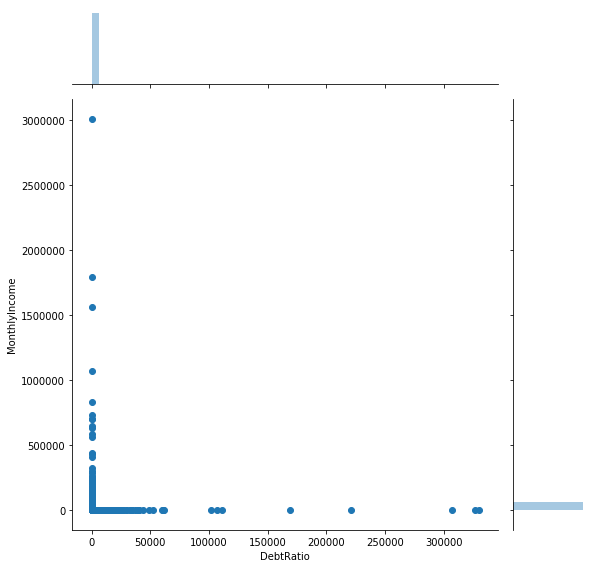

In [18]:
# Identify outliers with scatterplot
sns.jointplot(x="DebtRatio", y="MonthlyIncome", data=df, height=8)
plt.show()


In [19]:
# Removal of outliers
df = df.query('DebtRatio <= 1.0 and MonthlyIncome < 40000')


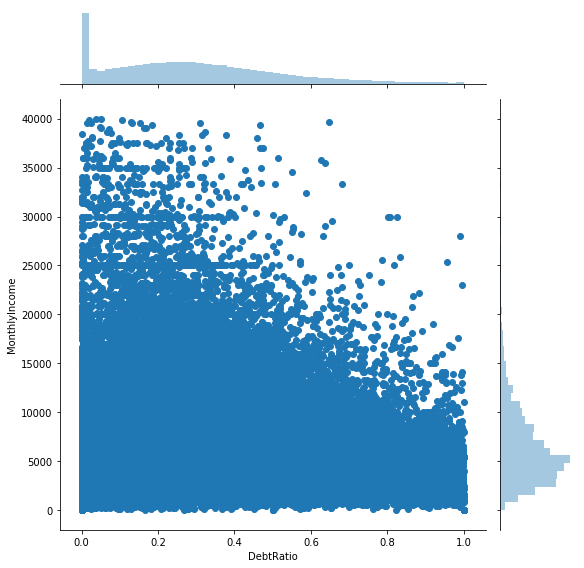

In [20]:
# Plot after outliers removed
sns.jointplot(x="DebtRatio", y="MonthlyIncome", data=df, height=8)
plt.show()


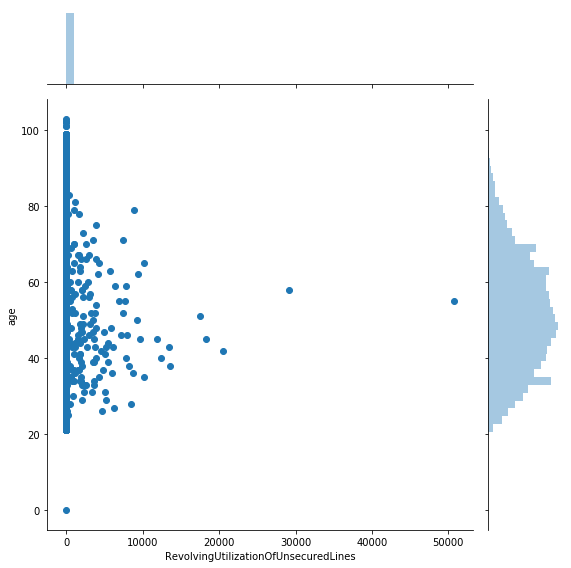

In [21]:
# Identify outliers with scatterplot
sns.jointplot(x="RevolvingUtilizationOfUnsecuredLines", y="age", data=df, height=8)
plt.show()


In [22]:
# Removal of outliers
df = df.query('age <= 100 and age > 0 and RevolvingUtilizationOfUnsecuredLines <= 1.0')

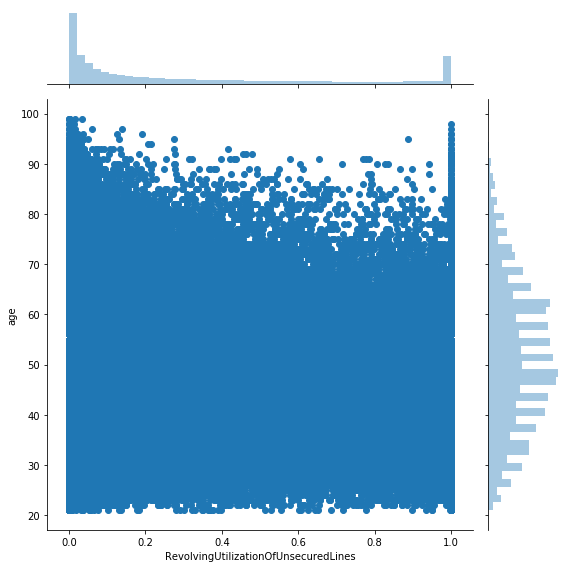

In [23]:
# Plot after outliers removed
sns.jointplot(x="RevolvingUtilizationOfUnsecuredLines", y="age", data=df, height=8)
plt.show()

In [24]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Dlqin2yrs
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,Yes
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,No
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,No
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,No
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,No


In [25]:
#Debt to Ratio categorization
df['Debt_Ratio'] = pd.cut(df['DebtRatio'], [-1, 0.3, 0.5, 1], labels=['Low', 'Medium', 'High'])

In [26]:
# Debt utilization line category
df['Revolving_Use'] = pd.cut(df['RevolvingUtilizationOfUnsecuredLines'], [-1, 0.5, 0.8, 1], labels=['Low', 'Mid', 'High'])

In [27]:
df['Income_level'] = pd.cut(df['MonthlyIncome'], [0, 5000, 10000, 25000, 100000], labels=['Lower', 'Middle', 'Mid-High', 'High'])

In [28]:
# Bin ages in age ranges for better analysis
bins = [18, 20, 35, 55, 75]
names = ['<20', '20-35', '35-55', '55-75', '75+']

d = dict(enumerate(names, 1))

df['AgeRange'] = np.vectorize(d.get)(np.digitize(df['age'], bins))

In [29]:
# Check the new categorical features 
df.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Dlqin2yrs,Debt_Ratio,Revolving_Use,Income_level,AgeRange
149994,149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,No,Medium,Low,Lower,35-55
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,No,Low,Low,Lower,55-75
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,No,High,Low,Middle,35-55
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,No,Low,Low,Middle,20-35
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0,No,Low,High,Middle,55-75


# Data Exploration



In [30]:
from IPython.core.display import display, HTML
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)

# Count of  serious delinquent cases vs non-delinquent cases
target = df['Dlqin2yrs'].value_counts()
levels = ['No','Yes']
trace = go.Pie(labels=target.index,values=target.values,
               marker=dict(colors=('blue','red')))
layout = dict(title="Percentage of Serious Delinquencies", margin=dict(l=150), width=500, height=500)
figdata = [trace]
fig = go.Figure(data=figdata, layout=layout)
iplot(fig)
# print target class counts
print(target)

No     105016
Yes      6753
Name: Dlqin2yrs, dtype: int64


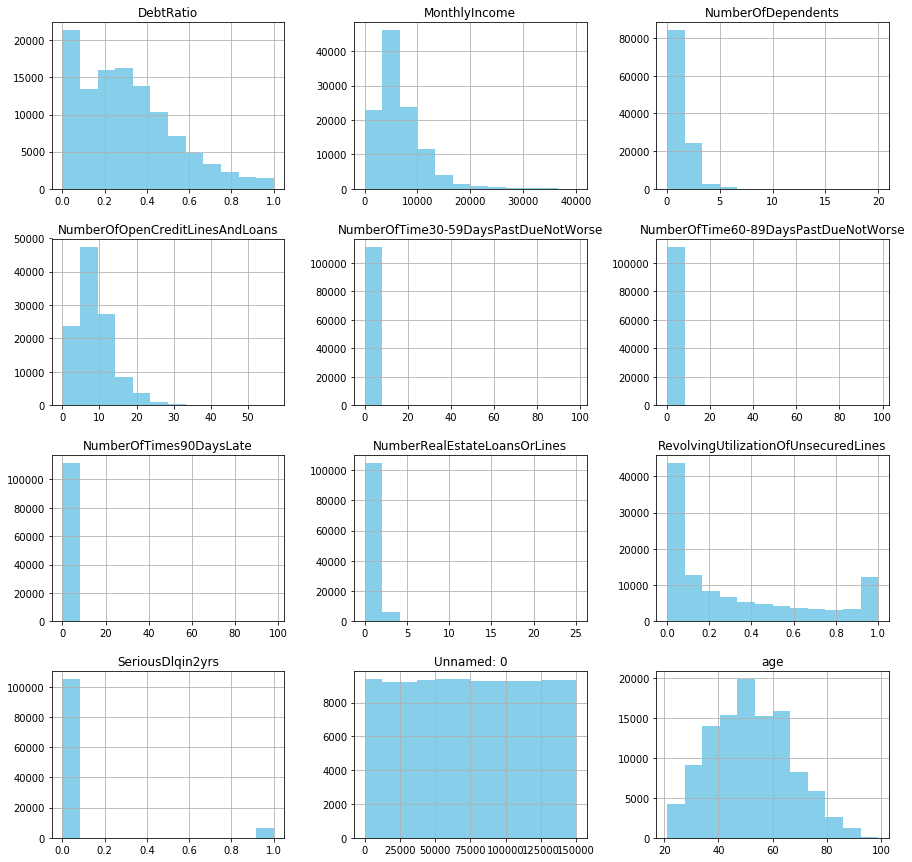

In [31]:
# plot histograms for each variable
df.hist(figsize = (15,15), color = "skyblue", bins=12)

plt.show()

In [33]:
# Correlation between features
corr = df.corr()
corr

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,1.000000,0.002019,-0.005904,0.005321,-0.002417,-0.000778,0.001707,0.003114,-0.002956,-0.000296,-0.002408,0.000203
SeriousDlqin2yrs,0.002019,1.000000,0.242176,-0.099406,0.122837,0.052589,-0.051351,-0.032329,0.116128,-0.016467,0.103991,0.042909
RevolvingUtilizationOfUnsecuredLines,-0.005904,0.242176,1.000000,-0.263513,0.123693,0.138876,-0.089655,-0.173496,0.114717,-0.079992,0.105047,0.079024
age,0.005321,-0.099406,-0.263513,1.000000,-0.063464,-0.076114,0.100282,0.170375,-0.062262,0.052096,-0.059212,-0.208137
NumberOfTime30-59DaysPastDueNotWorse,-0.002417,0.122837,0.123693,-0.063464,1.000000,-0.045848,-0.030529,-0.065232,0.987593,-0.037444,0.989815,-0.010682
DebtRatio,-0.000778,0.052589,0.138876,-0.076114,-0.045848,1.000000,-0.066360,0.358032,-0.062421,0.525493,-0.058935,0.106021
MonthlyIncome,0.001707,-0.051351,-0.089655,0.100282,-0.030529,-0.066360,1.000000,0.285233,-0.037250,0.403968,-0.033590,0.188934
NumberOfOpenCreditLinesAndLoans,0.003114,-0.032329,-0.173496,0.170375,-0.065232,0.358032,0.285233,1.000000,-0.086217,0.428362,-0.078748,0.054780
NumberOfTimes90DaysLate,-0.002956,0.116128,0.114717,-0.062262,0.987593,-0.062421,-0.037250,-0.086217,1.000000,-0.049813,0.994992,-0.016640
NumberRealEstateLoansOrLines,-0.000296,-0.016467,-0.079992,0.052096,-0.037444,0.525493,0.403968,0.428362,-0.049813,1.000000,-0.045022,0.141090


Text(0.5, 0.98, 'Correlation Heatmap')

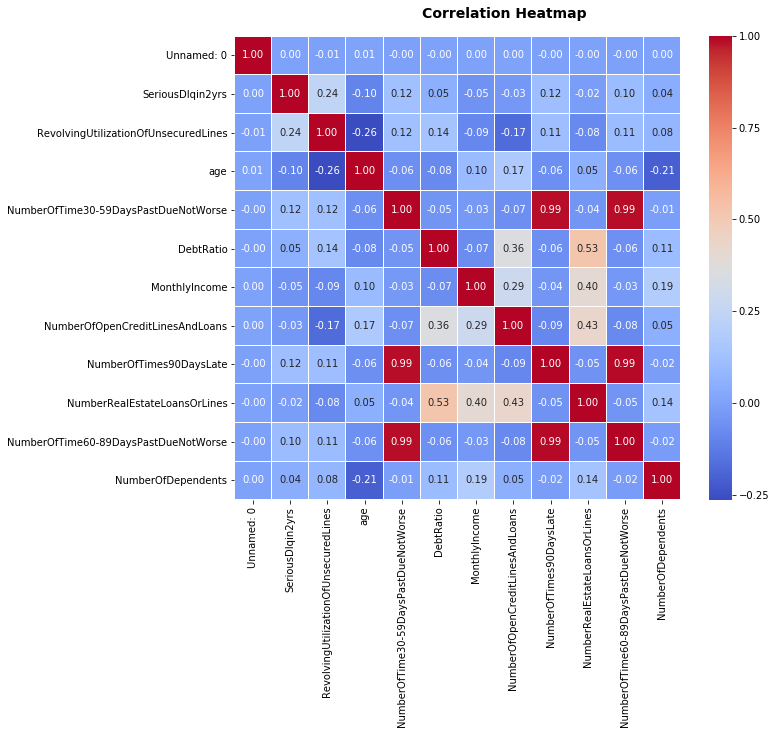

In [34]:
# Correlation heatmap
fig, (ax) = plt.subplots(1, 1, figsize=(10,8))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

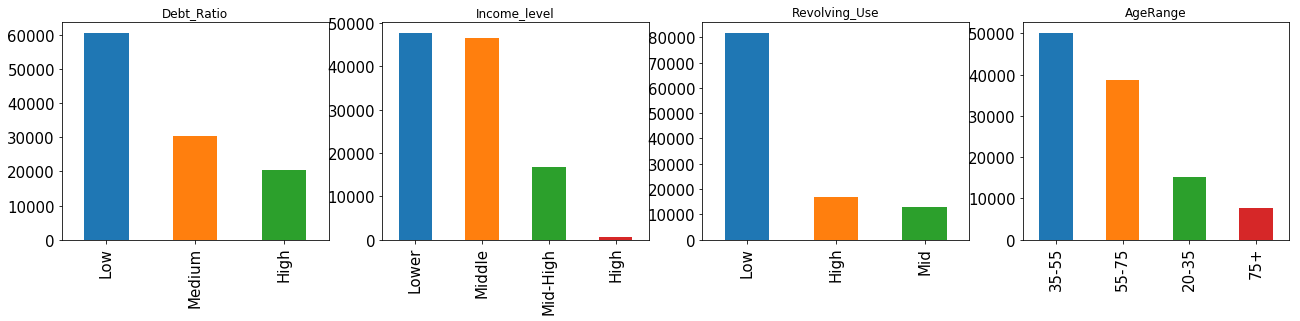

In [35]:
# Plots of created categorical features
categorical_features = ["Debt_Ratio", "Income_level", "Revolving_Use", "AgeRange"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot("bar",figsize=(22,4),fontsize=15,ax=ax[i]).set_title(categorical_feature)
fig.show()

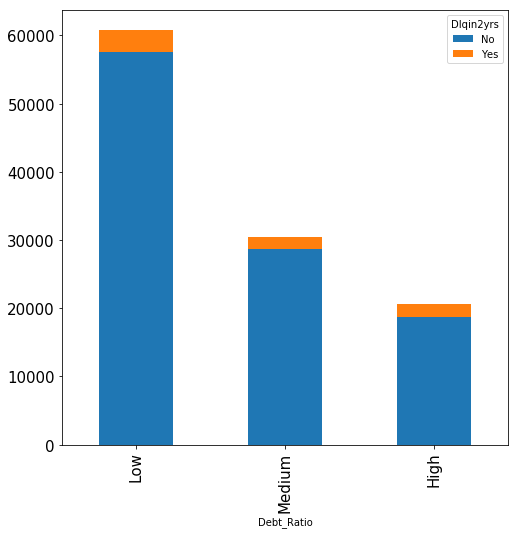

In [35]:
df.groupby(['Debt_Ratio','Dlqin2yrs'])['NumberOfDependents'].size().unstack().plot(kind='bar',stacked=True,figsize=(8,8),fontsize=15)
plt.show()

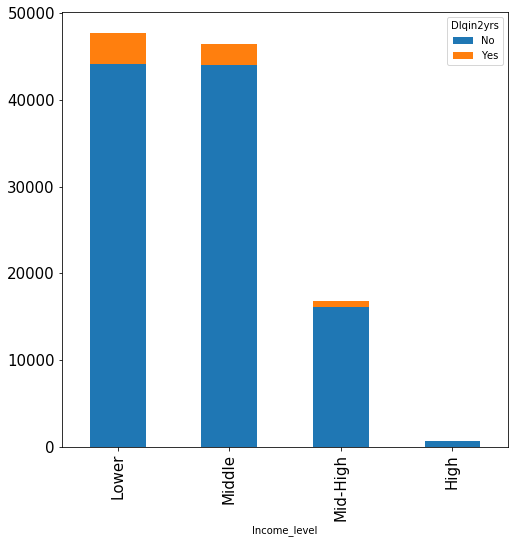

In [36]:
df.groupby(['Income_level','Dlqin2yrs'])['NumberOfDependents'].size().unstack().plot(kind='bar',stacked=True,figsize=(8,8),fontsize=15)
plt.show()

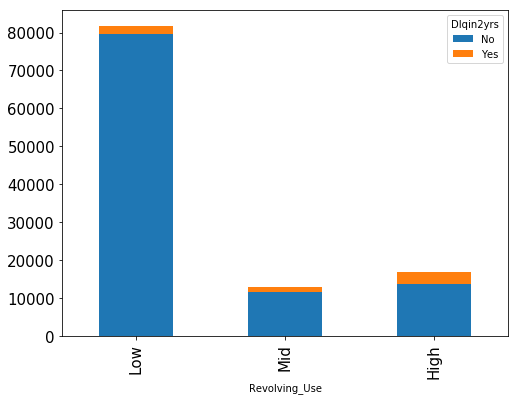

In [37]:
df.groupby(['Revolving_Use','Dlqin2yrs'])['NumberOfDependents'].size().unstack().plot(kind='bar',stacked=True,figsize=(8,6),fontsize=15)
plt.show()

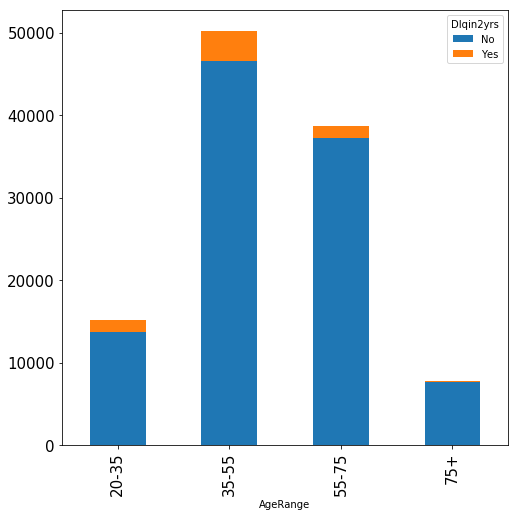

In [38]:
df.groupby(['AgeRange','Dlqin2yrs'])['NumberOfDependents'].size().unstack().plot(kind='bar',stacked=True,figsize=(8,8),fontsize=15)
plt.show()

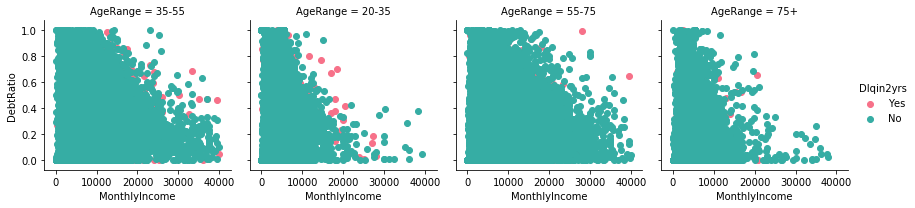

In [39]:
x = sns.FacetGrid(df, col='AgeRange', hue='Dlqin2yrs', palette='husl')
x = (x.map(plt.scatter, 'MonthlyIncome', 'DebtRatio').add_legend())


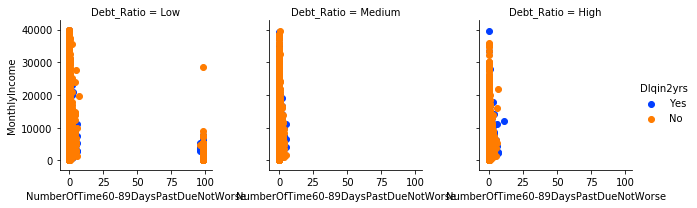

In [40]:
x = sns.FacetGrid(df, col='Debt_Ratio', hue='Dlqin2yrs', palette='bright')
x = (x.map(plt.scatter, 'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome').add_legend())


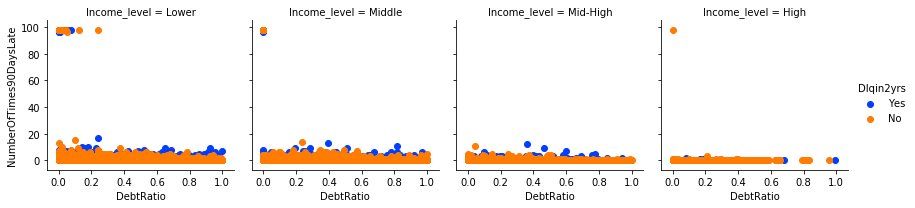

In [41]:
x = sns.FacetGrid(df, col='Income_level', hue='Dlqin2yrs', palette= 'bright')
x = (x.map(plt.scatter, 'DebtRatio', 'NumberOfTimes90DaysLate').add_legend())


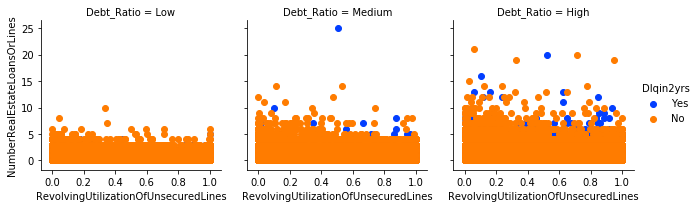

In [42]:
x = sns.FacetGrid(df, col='Debt_Ratio', hue='Dlqin2yrs', palette='bright')
x = (x.map(plt.scatter, 'RevolvingUtilizationOfUnsecuredLines', 'NumberRealEstateLoansOrLines').add_legend())


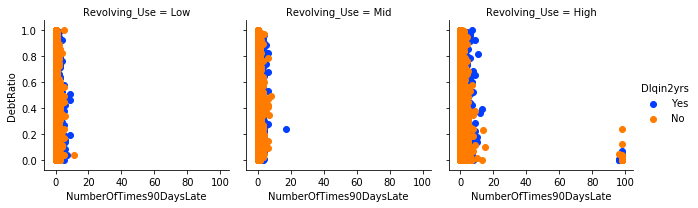

In [43]:
x = sns.FacetGrid(df, col='Revolving_Use', hue='Dlqin2yrs', palette= 'bright')
x = (x.map(plt.scatter, 'NumberOfTimes90DaysLate', 'DebtRatio').add_legend())


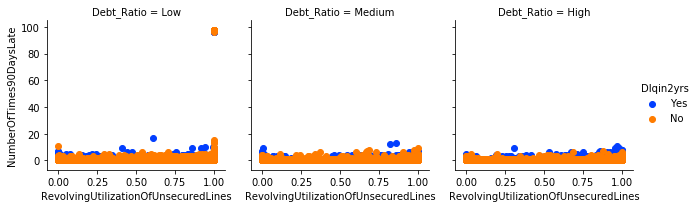

In [44]:
x = sns.FacetGrid(df, col='Debt_Ratio', hue='Dlqin2yrs', palette='bright')
x = (x.map(plt.scatter, 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate').add_legend())


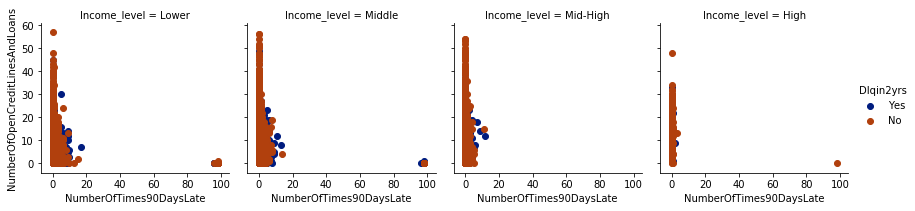

In [45]:
x = sns.FacetGrid(df, col='Income_level', hue='Dlqin2yrs', palette='dark')
x = (x.map(plt.scatter, 'NumberOfTimes90DaysLate', 'NumberOfOpenCreditLinesAndLoans').add_legend())


# Machine Learning Models

Machine learning models imported to predict whether a customer has had a serious delinquency in the past two years using the target feature (SeriousDlqin2yrs) and determine the factors that influence the delinquency.



In [ ]:
# Drop labels that are not useful for model development
X = df.drop(labels=['Unnamed: 0', 'Dlqin2yrs', 'Debt_Ratio', 'Revolving_Use', 'Income_level', 'AgeRange'],axis=1,inplace = True)


In [98]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [99]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [100]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    return model_mae

In [101]:
#import ML models and metrics
from sklearn.metrics import f1_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [102]:
#train and target
X=df.drop('SeriousDlqin2yrs',axis=1)
y=df['SeriousDlqin2yrs']



In [103]:
#create seperate train and test splits for validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [104]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.9386537830664161


# Feature Importance

The process of choosing the most relevant features in your data.

Below is a a visual of the features that are "Most relevant" and that can depend on many factors.  Feature importance can be something as simple as the highest correlation with the target, or the features with the most variance. 

The features with the highest correlation or negative correlation:

RevolvingUtilizationOfUnsecuredLines
NumberOfTimes90DaysLate
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse (negative correlation)	


AxesSubplot(0.08,0.07;0.87x0.81)


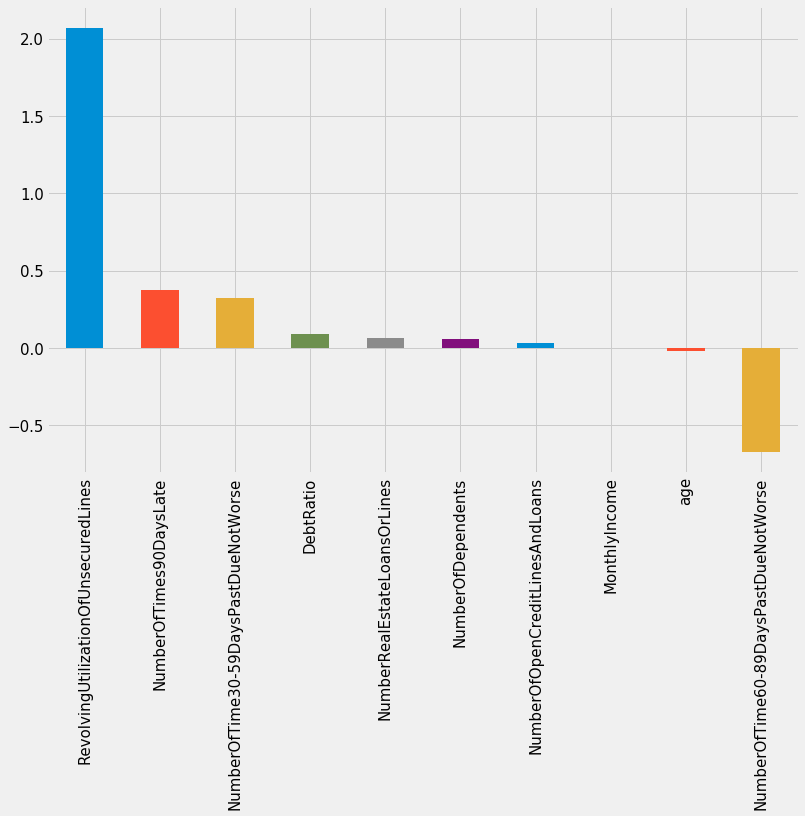

In [76]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:20].plot(kind='bar',figsize=(12,8),fontsize=15))
plt.show()

In [105]:
#create function for validation and return accuracy and roc-auc score
def evaluate_model(model):
    model.fit(X_train,y_train)
    prediction_test = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    rocauc = metrics.roc_auc_score(y_test, prediction_test)
    return accuracy,rocauc,prediction_test

In [106]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [107]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1)
acc,rocauc,testpred_lr  = evaluate_model(lr)
print('Logistic Regression...')
print('Accuracy score :',acc)
print('ROC-AUC score :',rocauc)

Logistic Regression...
Accuracy score : 0.9386836062151442
ROC-AUC score : 0.5181589545727041


In [108]:
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
acc,rocauc,testpred_rf  = evaluate_model(rf)
print('Random Forest...')
print('Accuracy score :',acc)
print('ROC-AUC score :',rocauc)

Random Forest...
Accuracy score : 0.9377292654558468
ROC-AUC score : 0.5531845327498569


In [109]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    return model_mae

In [110]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 0.1075


In [82]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.0365


In [51]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 0.0935


# Evaluating and Comparing Machine Learning Models

All of the models performed well. The model that holds the most promise for further development (such as hyperparameter tuning) is Random Forest Regression.  AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. The AUC scores are around 0.5, it means model has no class separation capacity whatsoever.


Logistic Regression...
Accuracy score : 0.9386836062151442
ROC-AUC score : 0.5181589545727041

Random Forest...
Accuracy score : 0.9372222719274701
ROC-AUC score : 0.5524589492410144


We are comparing models using the mean absolute error. This function below calculates the mean absolute error between true values and predictions. A single real-value performance metric in order to compare models because it simplifies the evaluate process.  Because we are doing regression, the mean absolute error represents the averae amount of our estimate if off by in the same units as the target value. 

Mean Absolute Error (MAE):
Linear Regression Performance on the test set: MAE = 0.1075
Random Forest Regression Performance on the test set: MAE = 0.0365
Gradient Boosted Regression Performance on the test set: MAE = 0.0935



